# Logistic Regression

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

%matplotlib inline

### 1. Prepare the data

In [2]:
df = pd.read_csv('../data/penguins_simple.csv', sep=';')
df = df[df['Species'] != 'Chinstrap'] # We want to do a binary classification
df.head(3)

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE


<AxesSubplot:xlabel='Body Mass (g)', ylabel='Culmen Length (mm)'>

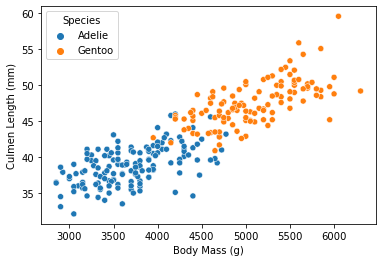

In [3]:
sns.scatterplot(x='Body Mass (g)', y='Culmen Length (mm)', hue='Species', data=df)

### 2. Build a Logistic Regression model

* classify a penguin as 'Adelie' or 'Gentoo' 
* use Body Mass and Culmen Length (x1, x2)
* We would like to find the coefficients (a1, a2, b) of the logistic function that result in the most accurate model (smallest possible log loss)

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
X = df[['Body Mass (g)', 'Culmen Length (mm)']]
y = df['Species']

In [6]:
# normalize, because body mass is much bigger
X = X / X.mean()

In [7]:
m = LogisticRegression()    # create the model
m.fit(X, y)                 # train the model -> find best coefficients

m.coef_

array([[5.87817954, 4.32111258]])

### 3. Evaluate the Model

In [8]:
# calculate the accuracy
m.score(X, y)

0.9433962264150944

### 4. Predict

In [9]:
ypred = m.predict(X)   # prediction for the same data points

In [10]:
ypred[:10]

array(['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie'], dtype=object)

<AxesSubplot:xlabel='Body Mass (g)', ylabel='Culmen Length (mm)'>

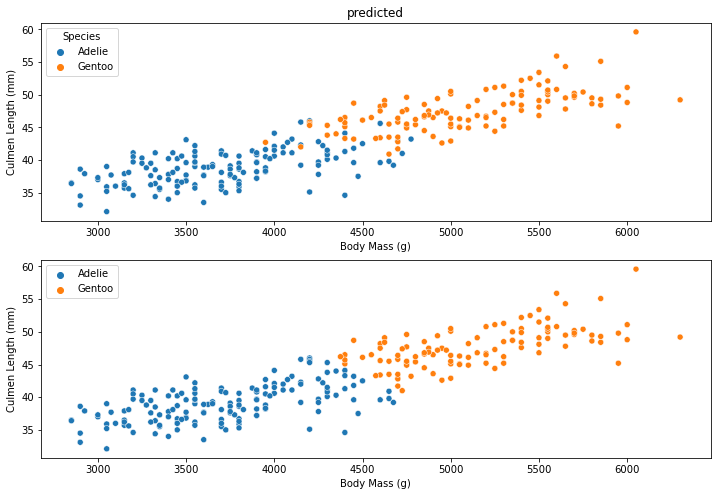

In [11]:
plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.title('true')
sns.scatterplot(x='Body Mass (g)', y='Culmen Length (mm)', hue='Species', data=df)
plt.title('predicted')
plt.subplot(2,1,2)
sns.scatterplot(x='Body Mass (g)', y='Culmen Length (mm)', hue=ypred, data=df)